In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = np.loadtxt('data-pca.txt', delimiter=',')

x = data[:,0]
y = data[:,1]

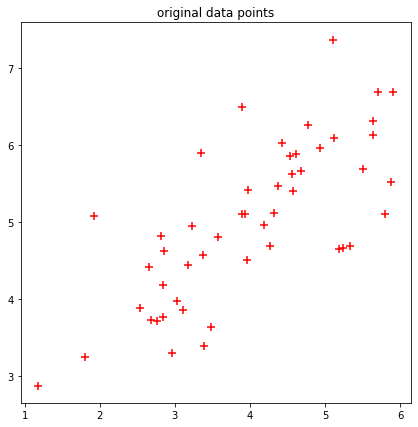

In [2]:
plt.figure(figsize=(7,7))
plt.title('original data points')
plt.scatter(x,y, c='red', s=70, marker='+')

In [3]:
def normalize_data(x, y):

    nomalized_x = (x - np.mean(x)) / np.std(x)
    nomalized_y= (y - np.mean(y)) / np.std(y)

    return nomalized_x, nomalized_y
nomalized_x, nomalized_y = normalize_data(x,y)

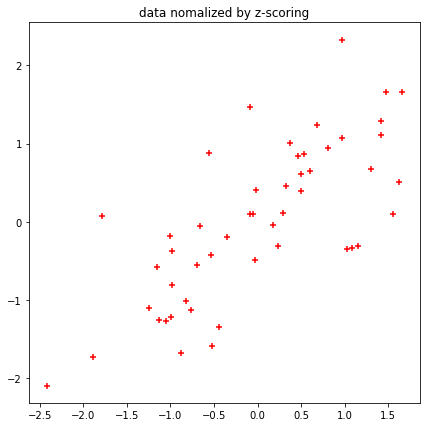

In [4]:
plt.figure(figsize=(7,7))
plt.title('data nomalized by z-scoring')
plt.scatter(nomalized_x,nomalized_y, c='red', marker='+')

In [5]:
def compute_covariance(x, y):
    n = x.shape[0]
    z = np.concatenate([x[:, None],y[:, None]],axis=1)
    covar = z.T.dot(z)/n   
    return covar
covar = compute_covariance(nomalized_x, nomalized_y)
covar

array([[1.     , 0.73553],
       [0.73553, 1.     ]])

In [6]:
def compute_principal_direction(covariance):

    eig_val, eig_vec = np.linalg.eig(covar)
    direction = eig_vec * eig_val
    return direction

direction = compute_principal_direction(covar)
direction

array([[ 1.22720503, -0.18700853],
       [ 1.22720503,  0.18700853]])

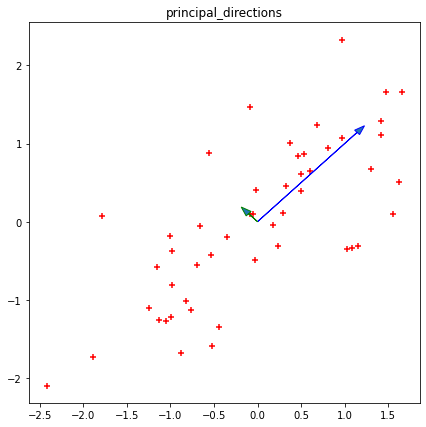

In [7]:
plt.figure(figsize=(7,7))
plt.title('principal_directions')
plt.scatter(nomalized_x,nomalized_y, c='red', marker='+')
direction1 = direction[:,0]
direction2 = direction[:,1]
plt.arrow(0,0,direction1[0], direction1[1], length_includes_head=True, head_width=0.08,ec ='blue')
plt.arrow(0,0,direction2[0], direction2[1], length_includes_head=True, head_width=0.08,ec ='green')

In [8]:
def compute_projection(point, axis):
    
    projection = np.dot(point, axis) / np.dot(axis, axis) * axis
    
    return projection

In [16]:
def compute_distance(point1, point2):

    distance = np.power(np.sum(np.power(point1 - point2,2)),0.5)

    return distance

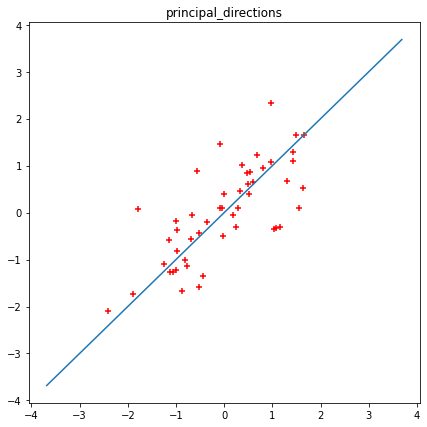

In [10]:
line1 = direction1*3
plt.figure(figsize=(7,7))
plt.title('principal_directions')
plt.scatter(nomalized_x,nomalized_y, c='red', marker='+')
plt.plot([-line1[0], line1[0]],[-line1[1],line1[1]])

In [11]:
z = np.concatenate([nomalized_x[:, None],nomalized_y[:, None]],axis=1)
proj_z = []
for point in z :
    proj_z.append(compute_projection(point, direction1))
proj_z = np.array(proj_z)

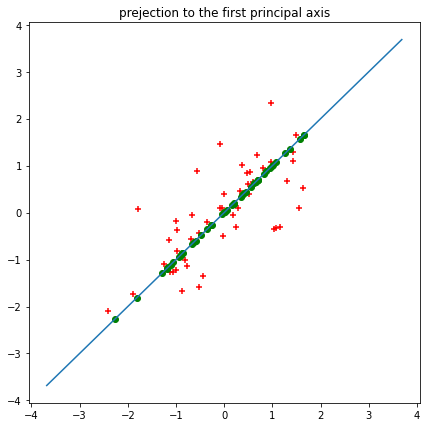

In [12]:
plt.figure(figsize=(7,7))
plt.title('prejection to the first principal axis')
plt.scatter(nomalized_x,nomalized_y, c='red', marker='+')
plt.plot([-line1[0], line1[0]],[-line1[1],line1[1]])
plt.scatter(proj_z[:,0],proj_z[:,1], c='green')

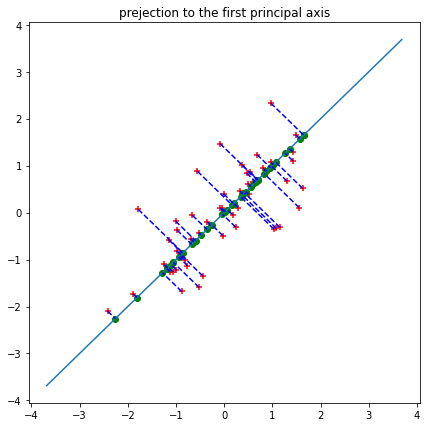

In [13]:
plt.figure(figsize=(7,7))
plt.title('prejection to the first principal axis')
plt.scatter(nomalized_x,nomalized_y, c='red', marker='+')
plt.plot([-line1[0], line1[0]],[-line1[1],line1[1]])
for i in range(proj_z.shape[0]) :
    plt.plot([nomalized_x[i], proj_z[i][0]],[nomalized_y[i], proj_z[i][1]], 'b--')
plt.scatter(proj_z[:,0],proj_z[:,1], c='green')

In [18]:
total = 0
for i in range(proj_z.shape[0]) :
    total += (compute_distance(np.array([nomalized_x[i], proj_z[i][0]]),np.array([nomalized_y[i], proj_z[i][1]])))
total

26.66854486205015

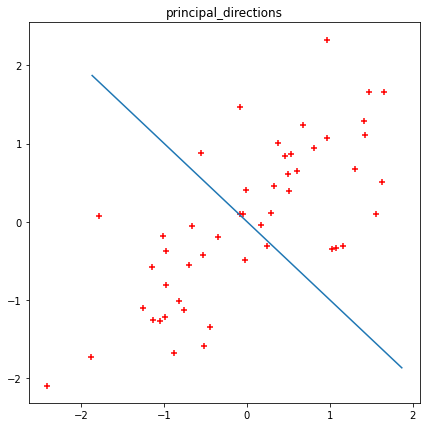

In [21]:
line2 = direction2*10
plt.figure(figsize=(7,7))
plt.title('principal_directions')
plt.scatter(nomalized_x,nomalized_y, c='red', marker='+')
plt.plot([-line2[0], line2[0]],[-line2[1],line2[1]])